# Traditional Machine Learning Evaluation

#### Load Packages

In [3]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib
from platform import python_version

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("pandas version:     ", pd.__version__)
print("scipy version:      ", scipy.__version__)
print("matplotlib version: ", matplotlib.__version__)

Python version:      3.10.9
sklearn version:     1.3.0
numpy version:       1.23.5
pandas version:      1.5.3
scipy version:       1.10.0
matplotlib version:  3.7.0


## 3.2 Commonly Used Evaluation Metrics

### 3.2.1 Classification

Working with the [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [4]:
import pandas as pd
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(link, header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


The first column is the id number, the next 9 are features, and the last is the class (malignant or benign).

Column 6 has 6 missing values.  Replacing with the mean of the column.

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imp_avg = SimpleImputer(missing_values=float("nan"), strategy = "mean")

imp = ColumnTransformer(transformers=[("avg", imp_avg, [6])])

imp.fit(data)
tmp = imp.transform(data)
data[6] = tmp
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Transforming the response column to one-hot encoding:

In [6]:
data[10] = data[10] == 2

In [7]:
y = data[10] == True

In [8]:
X = data.drop([0,10],axis=1)

In [9]:
X= X.to_numpy()

## Train/Test

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=143)

## Implement SVM

In [11]:
from sklearn.svm import SVC

SVM = SVC(probability=True)
SVM.fit(X_train1, y_train1)

SVC(probability=True)

## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

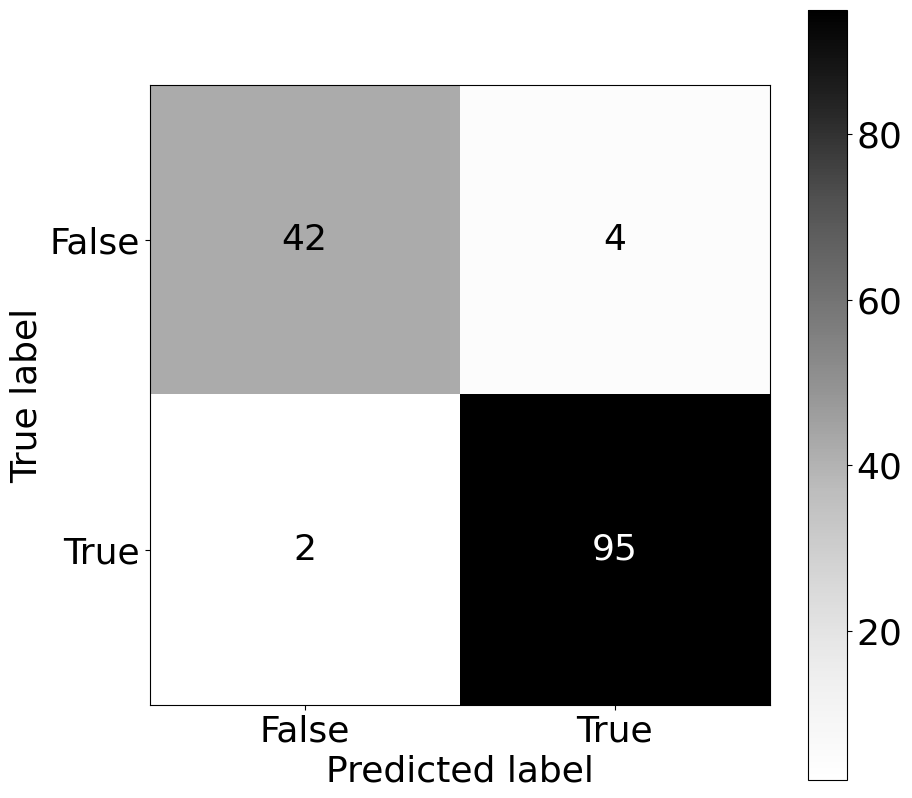

In [15]:
font = {'size'   : 26}
plt.rc('font', **font)
plt.figure(figsize=(10,10),dpi=100)
disp = ConfusionMatrixDisplay.from_estimator(SVM, X_test1, y_test1, cmap="Greys", ax=plt.gca())
plt.savefig("./Figures/Figure3-1.pdf",format="pdf",bbox_inches="tight")
plt.show()


## ROC Curve Example

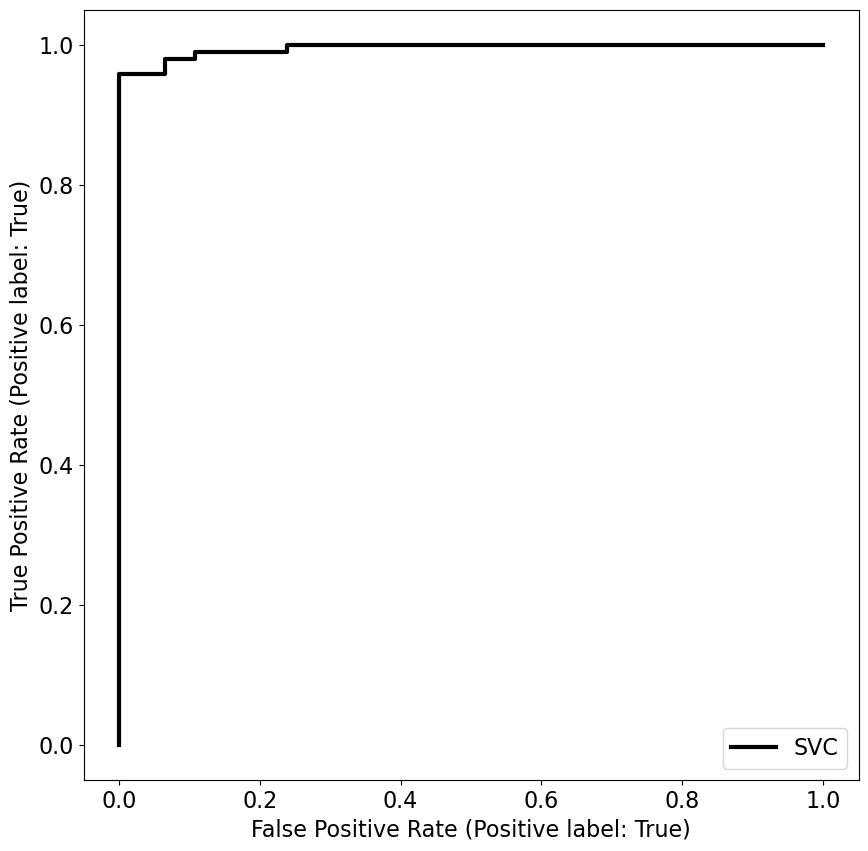

In [17]:
from sklearn.metrics import roc_curve, RocCurveDisplay

font = {'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
RocCurveDisplay.from_estimator(SVM, X_test1, y_test1, ax=plt.gca(), color = "k", lw=3, label="SVC")
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train1, y_train1)

DecisionTreeClassifier()

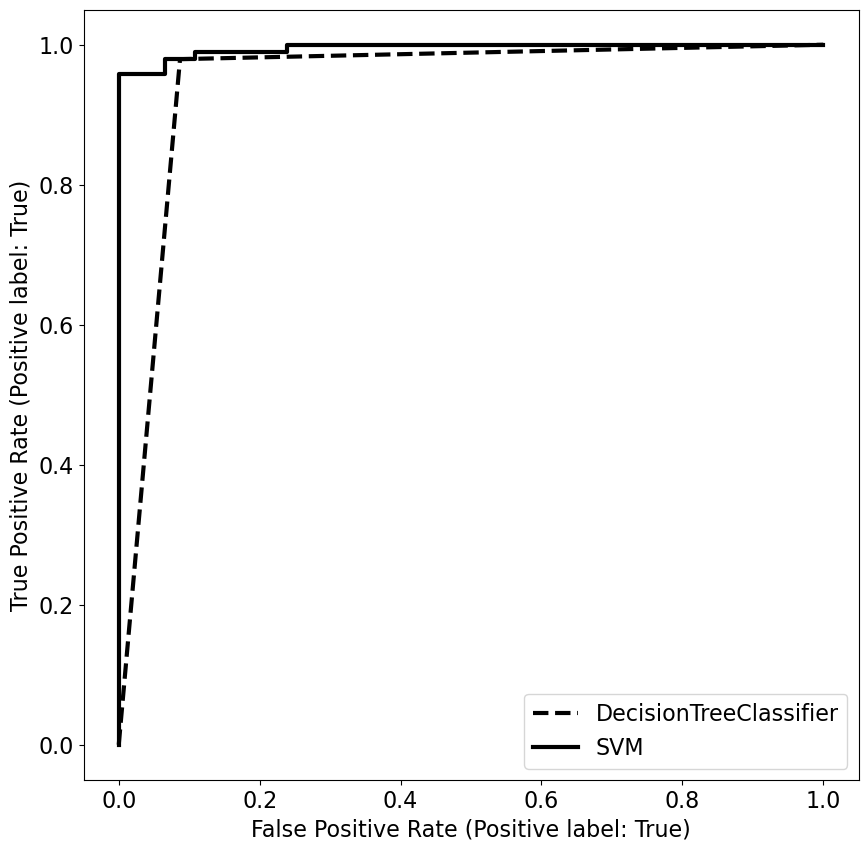

In [19]:
plt.figure(figsize=(10,10), dpi=100)

font = {'size'   : 16}
plt.rc('font', **font)
RocCurveDisplay.from_estimator(DT, X_test1, y_test1, ax = plt.gca(), ls="--", lw =3, color="k",
                              label="DecisionTreeClassifier")
RocCurveDisplay.from_estimator(SVM, X_test1, y_test1, ax = plt.gca(), color="k", lw=3,
                              label="SVM")
plt.legend(loc= "lower right")
plt.savefig("./Figures/Figure3-2.pdf",format="pdf")

plt.show()

# 3.2 Common Statistical Measures

### Table 3.4

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist["data"]
y = mnist["target"]


In [19]:
# Filter out digits greater than 4
yi = []

for i in range(len(y)):
    yi.append(int(y[i]))
    
idx = np.array(yi) < 5

X_sub = X[idx,:]
y_sub = y[idx]

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sub,y_sub)



In [22]:
best_svc = clf_grid.best_estimator_

best_svc.fit(X_train2, y_train2)

OneVsRestClassifier(estimator=SVC(C=1, degree=2, kernel='poly'))

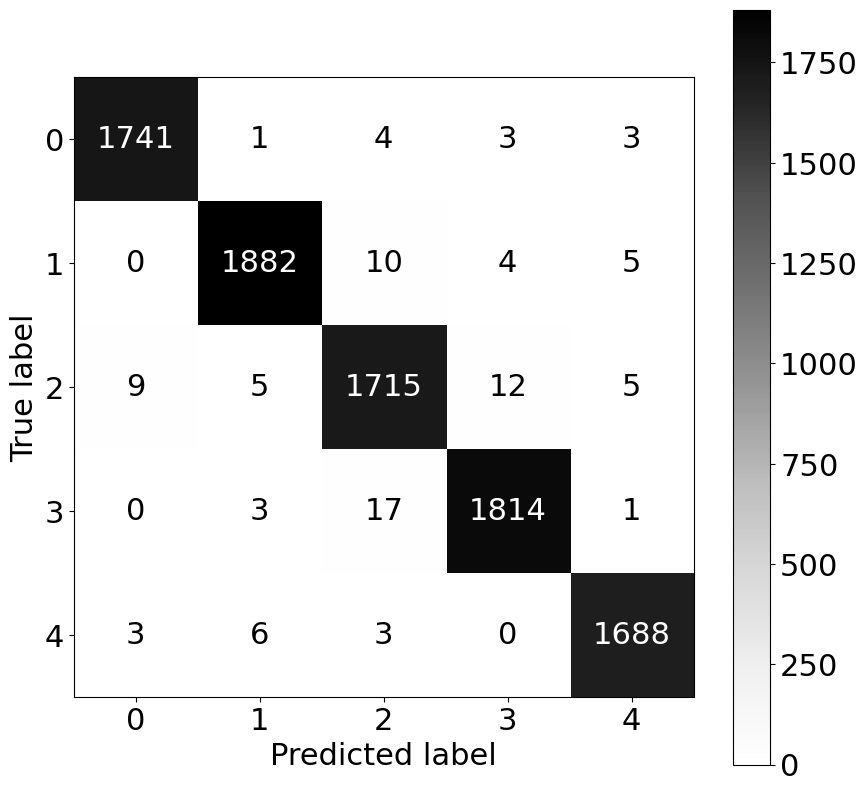

In [23]:
font = {'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
disp = ConfusionMatrixDisplay.from_estimator(best_svc, X_test2, y_test2, cmap="Greys", ax = plt.gca())
plt.savefig("./Figures/Table3-4.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### Accuracy

In [25]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# Average along rows (True Values)
np.unique(y_test2, return_counts=True)[1]

array([1752, 1901, 1746, 1835, 1700])

In [26]:
matrix = confusion_matrix(y_test2, best_svc.predict(X_test2))

In [27]:
np.diag(matrix)

array([1741, 1882, 1715, 1814, 1688])

In [31]:
sum(np.diag(matrix)) / sum(np.unique(y_test2, return_counts=True)[1])

0.9894783971345422

In [28]:
accuracy_score(y_test2, best_svc.predict(X_test2))

0.9894783971345422

#### Balanced Accuracy

In [32]:
sum((np.diag(matrix) / np.unique(y_test2, return_counts=True)[1])/5)

0.9894937776174733

In [29]:
balanced_accuracy_score(y_test2, best_svc.predict(X_test2))

0.9894937776174733

## Another Example

Working with the [Glass Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data)

In [7]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
from platform import python_version

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("pandas version:     ", pd.__version__)
print("scipy version:      ", scipy.__version__)
print("matplotlib version: ", matplotlib.__version__)

Python version:      3.10.9
sklearn version:     1.3.0
numpy version:       1.23.5
pandas version:      1.5.3
scipy version:       1.10.0
matplotlib version:  3.7.0


In [8]:
import pandas as pd
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
data = pd.read_csv(link, header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Train/Test

In [9]:
import pandas as pd
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
data = pd.read_csv(link, header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [10]:
X= data.iloc[:,1:10].to_numpy()
y= data.iloc[:,10].to_numpy()

from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=143)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Assuming X, y are your features and labels
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Create classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
    
}

# Train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train1, y_train1)
    y_pred = clf.predict(X_test1)
    print(f'Accuracy of {name}: {accuracy_score(y_test1, y_pred)}')


Accuracy of Logistic Regression: 0.7209302325581395
Accuracy of Random Forest: 0.8372093023255814
Accuracy of SVM: 0.7209302325581395
Accuracy of k-NN: 0.6976744186046512


In [12]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForest classifier
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}
Best Accuracy: 0.7667226890756302


In [13]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=10)

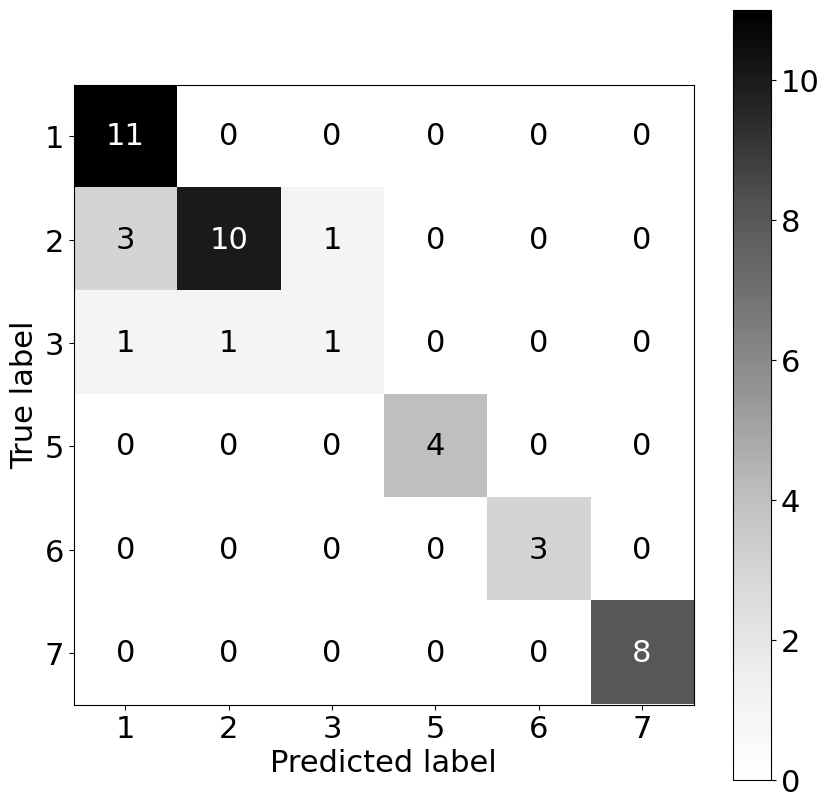

In [14]:
font = {'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
disp = ConfusionMatrixDisplay.from_estimator(best_svc, X_test1, y_test1, cmap="Greys", ax = plt.gca())
plt.savefig("Table3-4.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### Accuracy

In [15]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# Average along rows (True Values)
np.unique(y_test1, return_counts=True)[1]

array([11, 14,  3,  4,  3,  8], dtype=int64)

In [16]:
matrix = confusion_matrix(y_test1, best_svc.predict(X_test1))
np.diag(matrix)

array([11, 10,  1,  4,  3,  8], dtype=int64)

In [17]:
sum(np.diag(matrix)) / sum(np.unique(y_test1, return_counts=True)[1])

0.8604651162790697

In [18]:
accuracy_score(y_test1, best_svc.predict(X_test1))

0.8604651162790697

#### Balanced Accuracy

In [19]:
sum((np.diag(matrix) / np.unique(y_test1, return_counts=True)[1])/5)

1.0095238095238095

In [20]:
balanced_accuracy_score(y_test1, best_svc.predict(X_test1))

0.8412698412698413

## Example with yeast

In [68]:
yeast = pd.read_csv('./yeast/yeast.csv', delim_whitespace=True, header=None)

In [70]:
classes = [CYT
NUC    
MIT    
ME3    
ME2    
ME1   
EXC 
VAC   
POX    
ERL ]

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: 9, dtype: int64

In [76]:
# Use factorize to get unique labels
yeast.iloc[:, -1], uniques = pd.factorize(yeast.iloc[:, -1])
print(yeast.iloc[:, -1])
# print(uniques)

0       0
1       0
2       0
3       1
4       0
       ..
1479    5
1480    1
1481    5
1482    1
1483    2
Name: 9, Length: 1484, dtype: int64


In [77]:
X= yeast.iloc[:,1:9].to_numpy()
y= yeast.iloc[:,9].to_numpy()

from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=143)

In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Assuming X, y are your features and labels
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Create classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier()
    
}

# Train and evaluate
for name, clf in classifiers.items():
    clf.fit(X_train1, y_train1)
    y_pred = clf.predict(X_test1)
    print(f'Accuracy of {name}: {accuracy_score(y_test1, y_pred)}')


Accuracy of Logistic Regression: 0.622895622895623
Accuracy of Random Forest: 0.5925925925925926
Accuracy of SVM: 0.6161616161616161
Accuracy of k-NN: 0.6127946127946128


In [79]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForest classifier
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy: 0.6369216040846719


In [80]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=30, min_samples_split=10)

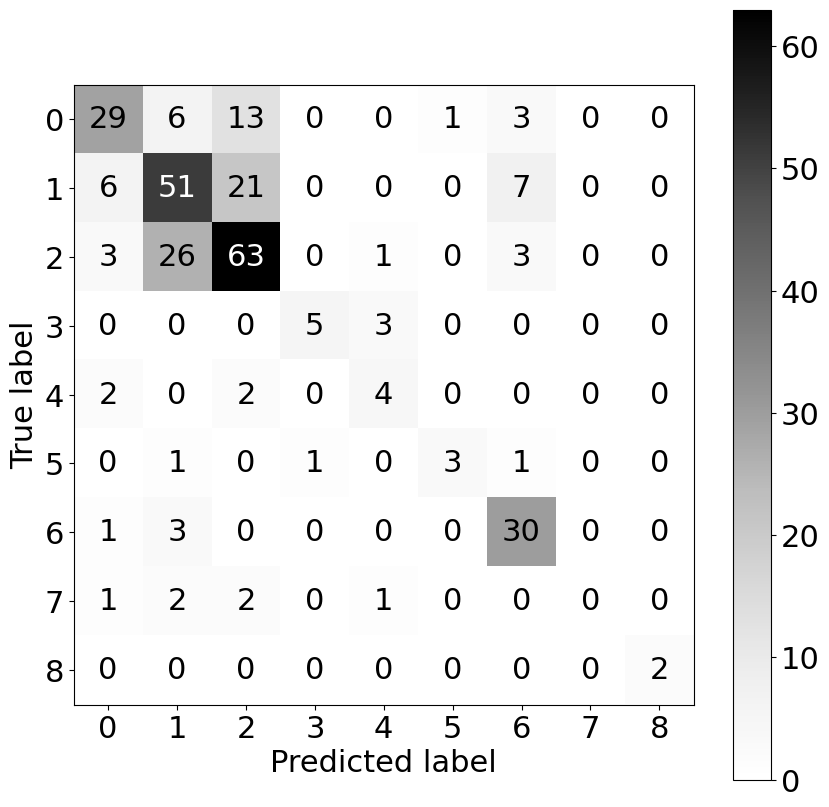

In [81]:
font = {'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
disp = ConfusionMatrixDisplay.from_estimator(best_svc, X_test1, y_test1, cmap="Greys", ax = plt.gca())
plt.savefig("Table3-4.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### Accuracy

In [82]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# Average along rows (True Values)
np.unique(y_test1, return_counts=True)[1]

array([52, 85, 96,  8,  8,  6, 34,  6,  2], dtype=int64)

In [83]:
matrix = confusion_matrix(y_test1, best_svc.predict(X_test1))
np.diag(matrix)

array([29, 51, 63,  5,  4,  3, 30,  0,  2], dtype=int64)

In [84]:
sum(np.diag(matrix)) / sum(np.unique(y_test1, return_counts=True)[1])

0.6296296296296297

In [85]:
accuracy_score(y_test1, best_svc.predict(X_test1))

0.6296296296296297

#### Balance Accuracy

In [86]:
sum((np.diag(matrix) / np.unique(y_test1, return_counts=True)[1])/5)

1.0642590497737556

In [87]:
balanced_accuracy_score(y_test1, best_svc.predict(X_test1))

0.5912550276520865

 # Common Statistical Tests
## 3.4.1 Two matched samples t-test

The code for this example can be found in the [jupyter notebook for Chapter 1: Statistics Overview](https://github.com/Lspoletini/EvaluatingMLAlgs/blob/main/Part_I/Chapter-1-Statistics-Overview/Statistics-Overview.ipynb) under ""(Chapter 3) Test Example Using Above Results"